# Assignment 6: t-Distributed Stochastic Neighbor Embedding (t-SNE)
## Part 1: Wine t-SNE
### Completed By: Qichun Yu

1. Import pandas, numpy, and matplotlib, as well as the t-SNE and PCA models from scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2. Load the Wine dataset using the wine.data file included in the accompanying source code and display the first five rows of data.

In [2]:
# load the Wine dataset
df = pd.read_csv('wine.data', header=None)

# display the first five rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


3. The first column provides the labels; extract these from the DataFrame and store them in a separate variable. Ensure that the column is removed from the DataFrame.

In [3]:
# store labels in a separate variable
labels = df[0]

# remove label column
del df[0]

In [4]:
# print out the first five rows to ensure label column is removed
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


4. Execute PCA to reduce the dataset to the first six components.

In [5]:
# reduce the dataset to the first six components
model_pca = PCA(n_components=6)
wine_pca = model_pca.fit_transform(df)

5. Determine the amount of variance within the data described by these six components. How did you find this?

In [6]:
# Find the percentage of variance described by the components(eigenvalues)
model_pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06])

In [7]:
# find the sum of the percentage of variance
np.sum(model_pca.explained_variance_ratio_)

0.99999314824536

The explained variance ratio is the percentage of the explained variance. The explained variance ratio = the explained variance / the total of explained variance. The sum function from numpy returns the sum of explained_variance_ratio_ array elements. 

6. Create a t-SNE model using a specified random state and a verbose value of 1.

In [8]:
# specify a random_state value of 0 and set verbose to 1
model_tsne = TSNE(random_state=0, verbose=1)
model_tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=1)

7. Fit the PCA data to the t-SNE model.

In [9]:
len(wine_pca)

178

In [10]:
# use t-SNE to transform the decomposed wine dataset
wine_tsne = model_tsne.fit_transform(wine_pca.reshape((len(wine_pca), -1)))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.207049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.191986
[t-SNE] KL divergence after 750 iterations: 0.128431


8. Confirm that the shape of the t-SNE fitted data is two-dimensional.

In [11]:
# visualize the number of dimensions in the returned dataset
wine_tsne.shape

(178, 2)

We have successfully reduced the numbr of dimensions down to 2. 

9. Create a scatter plot of the two-dimensional data. What do you see?

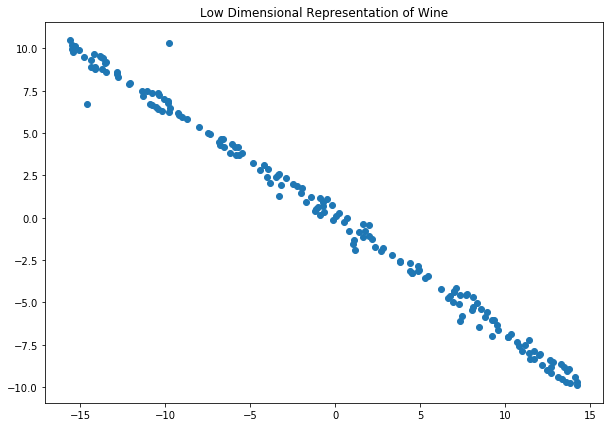

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(wine_tsne[:,0], wine_tsne[:,1])
plt.title('Low Dimensional Representation of Wine')
plt.show()

We can see there is a negative correlation between the two variables. 

10. Create a secondary scatter plot of the two-dimensional data with the class labels applied to visualize any clustering that may be present. Describe what you see.

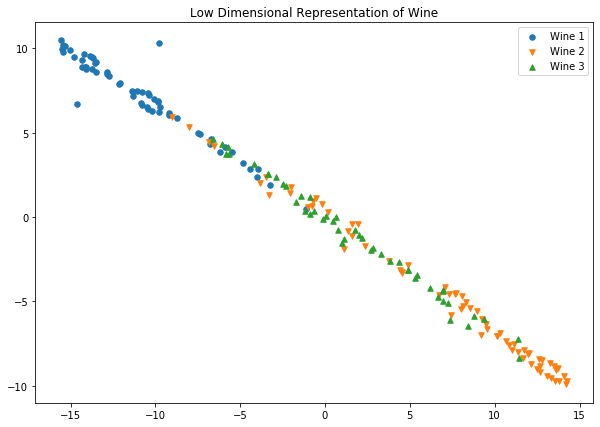

In [13]:
MARKER = ['o', 'v', '^',]
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')
for i in range(3):
    selections = wine_tsne[labels == (i+1)]
    plt.scatter(selections[:,0], selections[:,1], marker=MARKER[i], label=f'Wine {i+1}', s=30)
    plt.legend()
plt.show()

We can see a  negative correlation scatter plot labelled with three types of wine. The first type of wine is labelled in a blue circle. Most of wine 1 is located on the left-hand side of the plot when x <-3 and y > 1. The second type of wine is labelled in an orange triangle. Most of wine 2 is located on the right-hand side of the plot when the x value is higher than 5 and the y value is lower than -4. However, we can clearly see that there are some wine 2 located when -10<x<5 and -5<y<7. The third type of wine is labelled in a green triangle. Most wine 3 is located in the middle of the plot when the x value is between -10 to 10 and the y value is between -7 to 5. 

## Part 2: Perplexity and Iterations
### Completed By: Nick Angus

1. Import `pandas`, `numpy`, and `matplotlib`, as well as the `t-SNE` and `PCA` models from scikit-learn.

In [14]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

2. Load the Wine dataset and inspect the first five rows.

In [15]:
# loading in csv with appropriate column titles
wine_data = pd.read_csv('wine.data', names =['class', 'alcohol', 'malic_acid', 'ash', 'alkalinity_of_ash', 
                                               'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 
                                               'proanthocyanins', 'colour_intensity', 'hue', 'od280/od315_diluted_wines', 
                                               'proline'])
wine_data.head(5)

,class,alcohol,malic_acid,ash,alkalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,colour_intensity,hue,od280/od315_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


3. The first column provides the labels; extract these from the DataFrame and store them in a separate variable. Ensure that the column is removed from the DataFrame.

In [16]:
# splitting labels from data
labels = wine_data['class']
wine_data = wine_data.drop('class', axis = 1)

4. Execute PCA on the dataset and extract the first six components.

In [17]:
# pca of 6 components
model = PCA(n_components = 6)
pca_wine = model.fit_transform(wine_data.values)

5. Construct a loop that iterates through the perplexity values (1, 5, 20, 30, 80, 160, 320). For each loop, generate a t-SNE model with the corresponding perplexity and print a scatter plot of the labeled wine classes. Discuss the effect of different perplexity values.

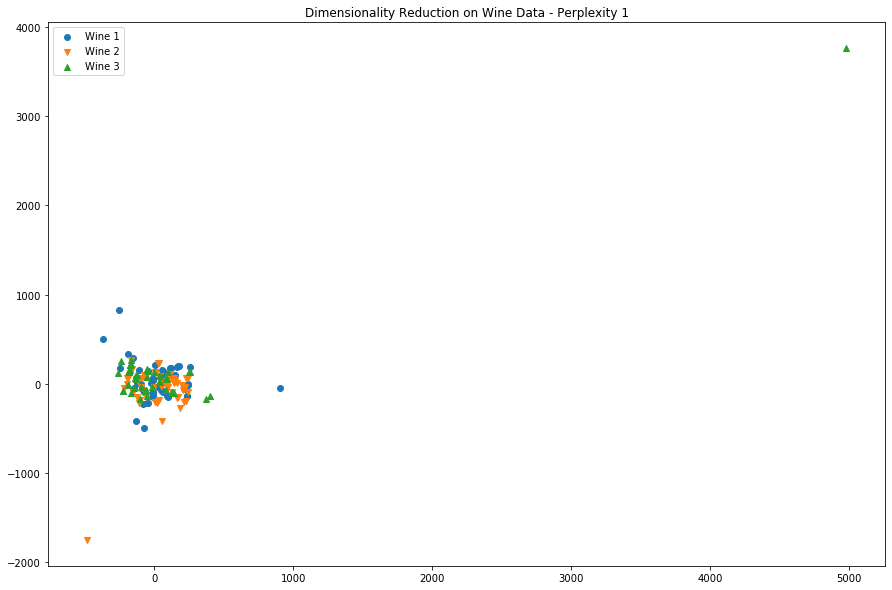

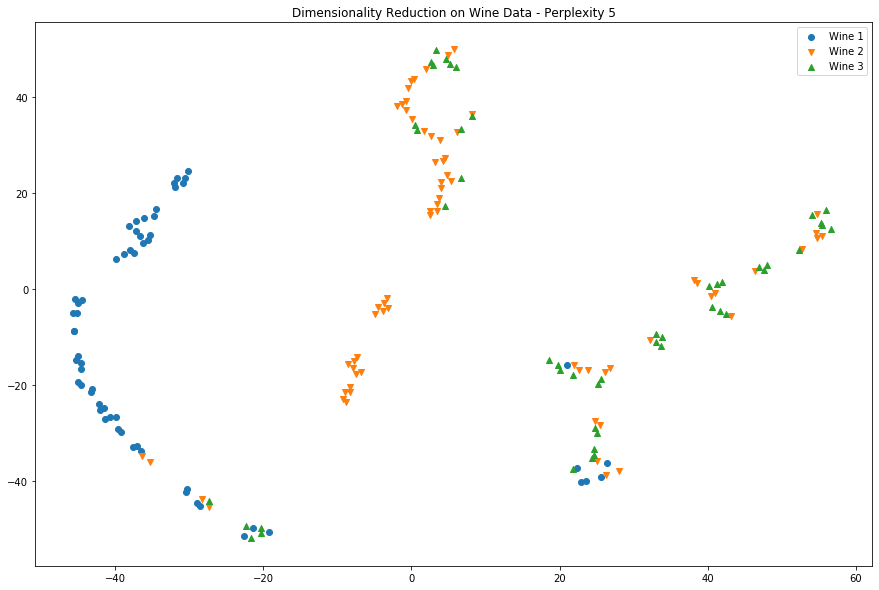

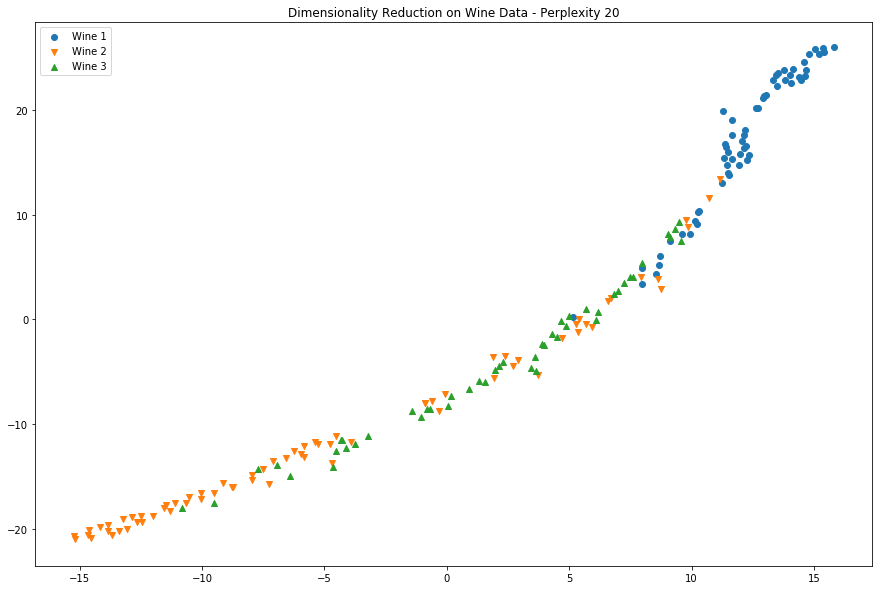

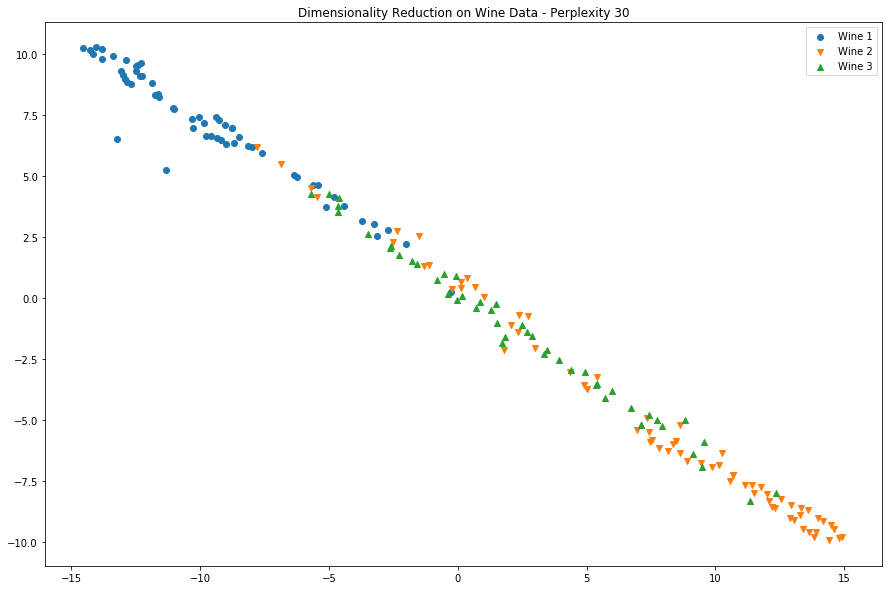

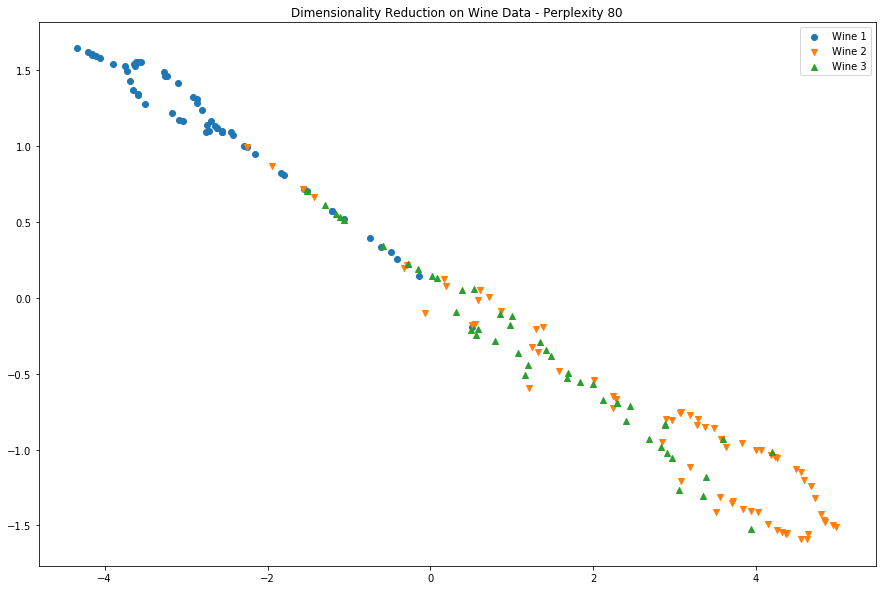

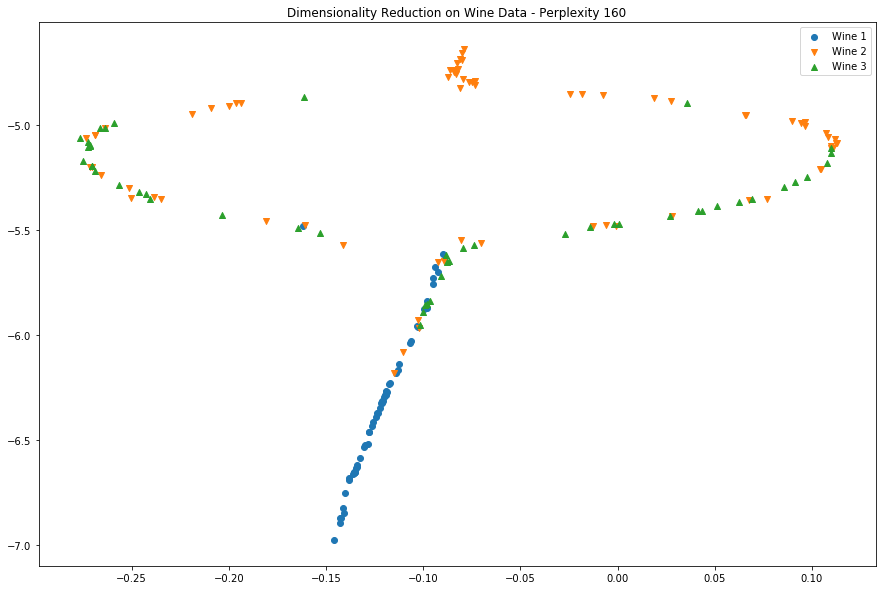

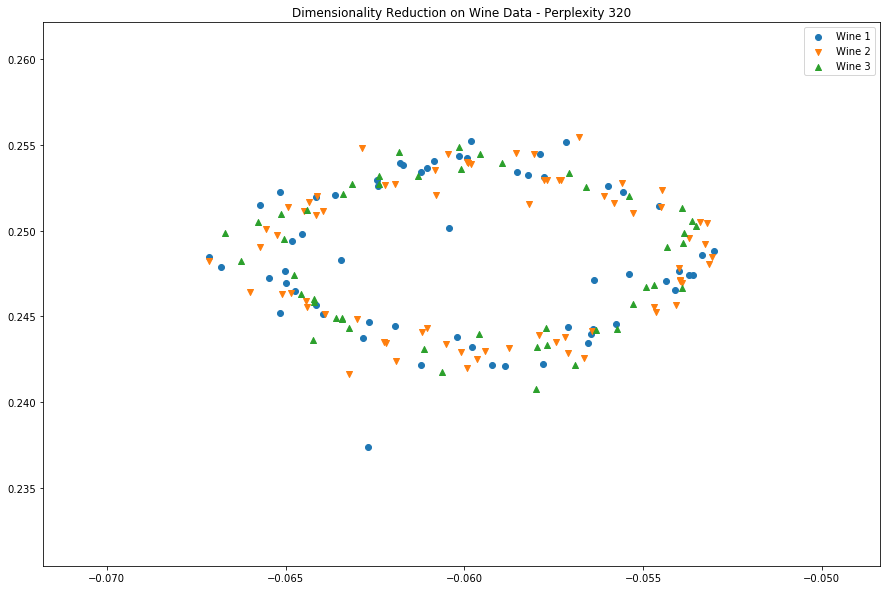

In [18]:
# visualizing higher dimenisonal data using tsne with different perplexity values
MARKER = ['o', 'v', '^']
for val in [1, 5, 20, 30, 80, 160, 320]:
    tsne = TSNE(random_state = 25, perplexity = val)
    tsne_wine = tsne.fit_transform(pca_wine)
    plt.figure(figsize = (15, 10))
    plt.title(f'Dimensionality Reduction on Wine Data - Perplexity {val}')
    for i in range(3):
        selections = tsne_wine[labels == (i+1)]
        plt.scatter(selections[:,0], selections[:,1], marker = MARKER[i], label = f'Wine {i+1}')
        plt.legend()
plt.show()

*Perplexity 1*: Most of the data is clustered together.<br>
*Perplexity 5*: No patterns or clusters easily identifiable.<br>
*Perplexity 20*: Clusters are visible but shape of the pattern is unclear.<br>
*Perplexity 30*: Clusters are visible and pattern is linear. This appears to be the best value for perplexity.<br>
*Perplexity 80*: Cluster are somewhat visible but the pattern is unclear.<br>
*Perplexity 160*: Cluster are somewhat visible but the pattern is unclear.<br>
*Perplexity 320*: The data forms a shape, but there is no clear clusters or all the clusters are placed on each other.

6. Construct a loop that iterates through the iteration values (250, 500, 1000). For each loop, generate a t-SNE model with the corresponding number of iterations and an identical number of iterations without progress values. Construct a scatter plot of the labeled wine classes for each number of iterations. Discuss the effect of different iteration values.

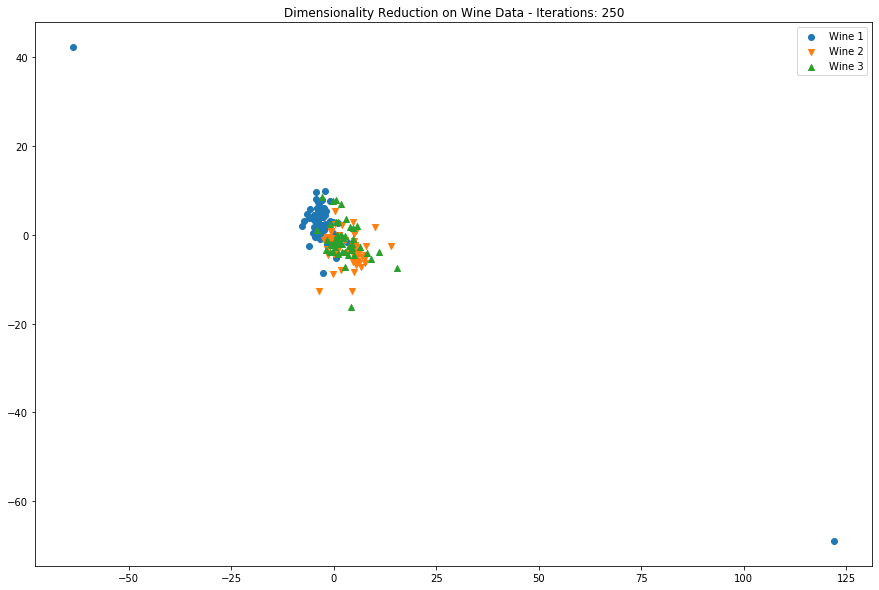

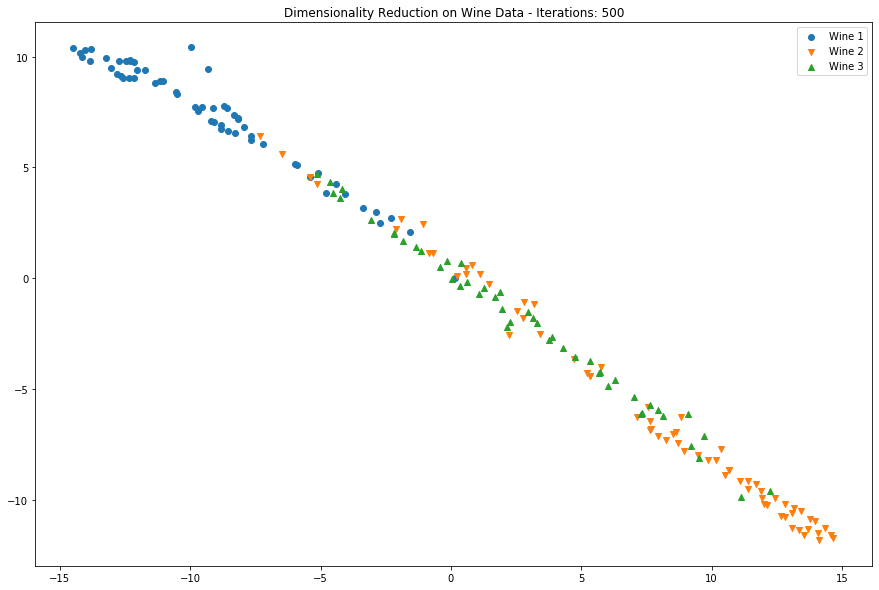

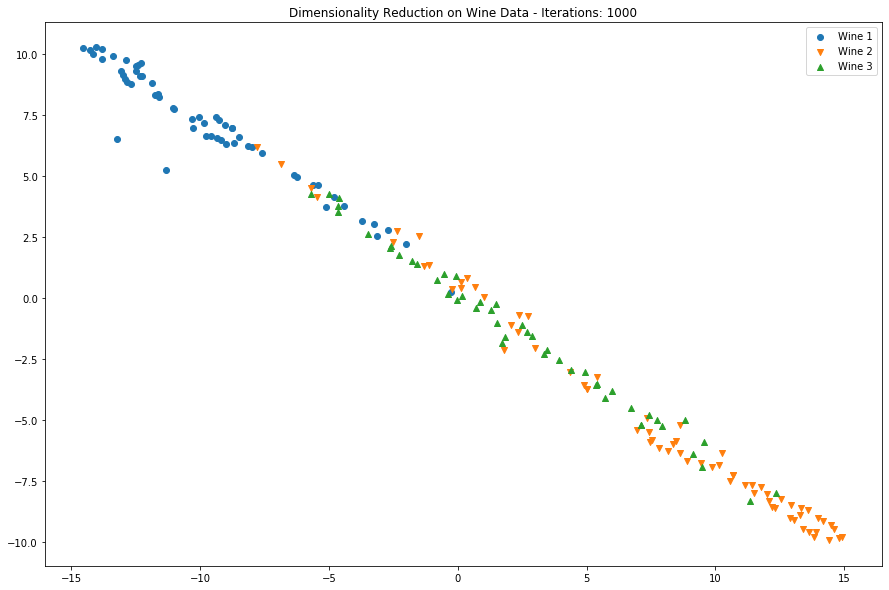

In [19]:
# visualizing higher dimenisonal data using tsne with different iteration values
for val in [250, 500, 1000]:
    tsne = TSNE(random_state = 25, n_iter = val)
    tsne_wine = tsne.fit_transform(pca_wine)
    plt.figure(figsize = (15, 10))
    plt.title(f'Dimensionality Reduction on Wine Data - Iterations: {val}')
    for i in range(3):
        selections = tsne_wine[labels == (i+1)]
        plt.scatter(selections[:,0], selections[:,1], marker = MARKER[i], label = f'Wine {i+1}')
        plt.legend()
    plt.show()

*Iterations 250*: Most of the data is clustered together<br>
*Iterations 500*: Clusters are visible and pattern is linear. This appears to be the best value for iterations.<br>
*Iterations 1000*: Similar to result for 500 iterations, but more computation involved. Therefore, not as good.<br>